In [1]:
import os
import pandas as pd
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Print the current working directory
print("Current directory:", current_dir)

Current directory: C:\data_science


In [3]:
# Define the path to the directory containing the audio files
data_dir = r"C:\data_science\genres_original"

In [4]:
# Define the genres
genres = ["blues","classical","country","disco","hiphop","metal","pop","reggae","rock"]

In [5]:
# Define the number of MFCCs and Chroma features to extract
num_mfcc = 20
num_chroma = 12

In [6]:
# Define the path to the directory containing the audio files
audio_file = "C:\data_science\genres_original\metal\metal.00000.wav"
y, sr = librosa.load(audio_file)

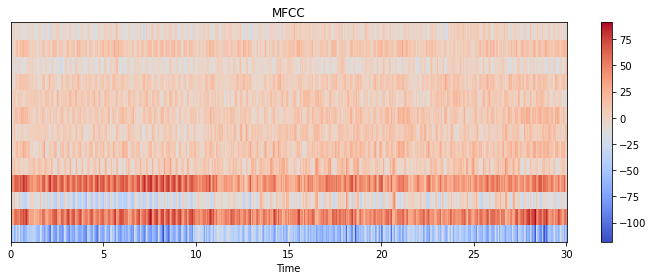

In [7]:
import matplotlib.pyplot as plt
y, sr = librosa.load(audio_file)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Visualize MFCC features
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

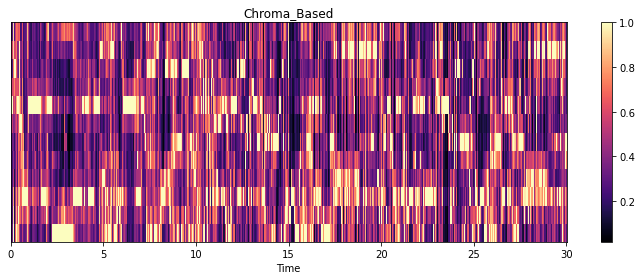

In [8]:
y, sr = librosa.load(audio_file)

# Extract Chrome feature
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

#Visuaize Chrome Feature
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, x_axis='time')
plt.colorbar()
plt.title('Chroma_Based')
plt.tight_layout()
plt.show()

In [9]:
# Initialize empty lists to store the features and labels
X = []
y = []
mfs =[]
cms =[]
scs = []

In [10]:
# Loop through each genre
for genre in genres:
    # Define the path to the genre directory
    genre_dir = os.path.join(data_dir, genre)
    
    # Loop through each audio file in the genre directory
    for filename in os.listdir(genre_dir):
        # Load the audio file
        filepath = os.path.join(genre_dir, filename)
        signal, sr = librosa.load(filepath)
        
        # Extract MFCCs and Chroma features
        mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=num_mfcc)
        chroma = librosa.feature.chroma_stft(y=signal, sr=sr, n_chroma=num_chroma)
        spectral_centroids = librosa.feature.spectral_centroid(y=signal, sr=sr)
        
        # Append the results to the respective lists
        mfs.append(mfccs)
        cms.append(chroma)
        y.append(genre)
        scs.append(spectral_centroids)

In [11]:
len(cms)

900

In [15]:
mfs[0].shape

(20, 1293)

In [31]:
# Calculate mean and variance of each row in each matrix
data1 = []
for i, mfcc in enumerate(mfs):
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_var = np.var(mfcc, axis=1)
    row_data = []
    for j in range(1, 21):
        row_data += [mfcc_mean[j-1], mfcc_var[j-1]]
    data1.append(row_data)

In [32]:
data1

[[-113.59882,
  2569.3694,
  121.57067,
  295.8471,
  -19.162262,
  235.58444,
  42.36394,
  151.03874,
  -6.362266,
  167.99287,
  18.621931,
  89.17242,
  -13.699734,
  67.60309,
  15.339802,
  69.001495,
  -12.274304,
  82.21984,
  10.970945,
  63.346542,
  -8.326061,
  61.76499,
  8.802088,
  51.280754,
  -3.6699412,
  41.215897,
  5.744676,
  40.51752,
  -5.162783,
  49.784233,
  0.7517066,
  52.424534,
  -1.687854,
  36.535866,
  -0.40872997,
  41.60317,
  -2.3026767,
  55.053654,
  1.2224673,
  46.941353],
 [-207.52383,
  7769.1045,
  123.98514,
  559.9134,
  8.94702,
  572.3363,
  35.86715,
  264.7167,
  2.9095943,
  279.97604,
  21.519472,
  156.36682,
  -8.556513,
  200.80203,
  23.370676,
  142.56711,
  -10.103608,
  166.11464,
  11.899242,
  104.35725,
  -5.558824,
  105.15637,
  5.3778763,
  96.20454,
  -2.2344916,
  64.87307,
  4.220704,
  73.15043,
  -6.010687,
  52.429462,
  0.92929417,
  55.337963,
  -0.7284029,
  60.231407,
  0.29687235,
  48.133213,
  -0.28243038,
  

In [33]:
# Create dataframe with mean and variance for each row in each matrix
import pandas as pd
columns = []
for j in range(1, 21):
        columns += [f"mfcc{j}_mean", f"mfcc{j}_var"]
df1 = pd.DataFrame(data1, columns=columns)

In [34]:
df1

,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,-113.598824,2569.369385,121.570671,295.847107,-19.162262,235.584442,42.363941,151.038742,-6.362266,167.992874,...,0.751707,52.424534,-1.687854,36.535866,-0.408730,41.603168,-2.302677,55.053654,1.222467,46.941353
1,-207.523834,7769.104492,123.985138,559.913391,8.947020,572.336304,35.867149,264.716705,2.909594,279.976044,...,0.929294,55.337963,-0.728403,60.231407,0.296872,48.133213,-0.282430,51.106014,0.530644,45.788700
2,-90.757164,3317.886963,140.440872,508.856140,-29.084547,412.064423,31.686693,143.954224,-13.976547,155.661346,...,2.448304,40.641678,-7.724840,47.629646,-1.819024,52.393597,-3.440458,46.643394,-2.238128,30.653151
3,-199.575134,5508.266602,150.086105,456.309082,5.663404,257.109772,26.855278,158.361130,1.770071,267.973724,...,0.773994,44.432903,-3.324069,50.218452,0.636311,37.325726,-0.615968,37.257774,-3.405046,31.965254
4,-160.354172,5199.103516,126.209480,853.271240,-35.581394,334.032349,22.139256,193.753235,-32.473549,336.425415,...,-4.515862,85.995201,-5.451786,75.276741,-0.915952,53.633236,-4.408018,62.882484,-11.704385,55.190254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-153.630051,2539.259521,109.904785,453.897491,-23.091644,188.182663,59.014496,130.923645,-7.520482,89.958153,...,1.803152,45.036552,-13.293470,41.667389,2.483825,36.720833,-6.716792,54.836437,-1.198403,49.946903
896,-142.416214,3282.149170,116.205460,344.590790,-32.160263,190.753342,49.111511,66.638252,-8.389906,81.149292,...,3.736334,33.842628,-10.860102,39.252411,1.877822,32.027817,-7.468264,39.176170,-2.791855,31.719294
897,-124.989655,1683.037842,115.182343,475.291626,-47.985886,290.234253,52.820343,113.748276,-13.493603,76.998184,...,1.838066,33.591026,-12.851801,36.294918,3.445699,35.954891,-12.589926,42.507107,-2.104325,29.860994
898,-225.033325,10766.061523,123.657265,493.225769,-9.745124,604.334351,56.613846,189.845108,10.421821,156.244659,...,-2.810897,46.314507,-4.421513,43.620602,1.558363,34.335720,-5.046077,47.172318,-3.587599,41.296360


In [35]:
cms[0].shape

(12, 1293)

In [36]:
data2 = []
for i,chrm  in enumerate(cms):
    chrm_mean = np.mean(chrm, axis=1)
    chrm_var = np.var(chrm, axis=1)
    row_data = []
    for j in range(1, 13):
        row_data += [chrm_mean[j-1], chrm_var[j-1]]
    data2.append(row_data)

In [37]:
data2

[[0.36224282,
  0.106950246,
  0.367817,
  0.081769824,
  0.43983436,
  0.09995376,
  0.24469176,
  0.0446469,
  0.247862,
  0.06566809,
  0.3356164,
  0.08352277,
  0.36461875,
  0.07684794,
  0.43568376,
  0.11980225,
  0.29598564,
  0.06438382,
  0.3150803,
  0.0787414,
  0.4070083,
  0.110864565,
  0.38510066,
  0.08566732],
 [0.4600403,
  0.14257708,
  0.35018247,
  0.088213086,
  0.32080683,
  0.09506488,
  0.21147157,
  0.05233193,
  0.20078844,
  0.043679167,
  0.3307942,
  0.096678756,
  0.39737874,
  0.07982032,
  0.560355,
  0.13455161,
  0.38417926,
  0.0871986,
  0.25532576,
  0.054375563,
  0.28477612,
  0.07785594,
  0.33409372,
  0.07245459],
 [0.27290025,
  0.04471613,
  0.19595265,
  0.032730903,
  0.31516543,
  0.073728785,
  0.40798622,
  0.07359393,
  0.54682016,
  0.122630484,
  0.32169873,
  0.05557937,
  0.30465698,
  0.05848236,
  0.2884035,
  0.06320126,
  0.33415222,
  0.06114503,
  0.40181875,
  0.1109646,
  0.38438946,
  0.063252136,
  0.58850825,
  0.12460

In [38]:
# Create dataframe with mean and variance for each row in each matrix
import pandas as pd
columns = []
for j in range(1, 13):
        columns += [f"chroma{j}_mean", f"chroma{j}_var"]
df2 = pd.DataFrame(data2, columns=columns)

In [39]:
df2

,chroma1_mean,chroma1_var,chroma2_mean,chroma2_var,chroma3_mean,chroma3_var,chroma4_mean,chroma4_var,chroma5_mean,chroma5_var,...,chroma8_mean,chroma8_var,chroma9_mean,chroma9_var,chroma10_mean,chroma10_var,chroma11_mean,chroma11_var,chroma12_mean,chroma12_var
0,0.362243,0.106950,0.367817,0.081770,0.439834,0.099954,0.244692,0.044647,0.247862,0.065668,...,0.435684,0.119802,0.295986,0.064384,0.315080,0.078741,0.407008,0.110865,0.385101,0.085667
1,0.460040,0.142577,0.350182,0.088213,0.320807,0.095065,0.211472,0.052332,0.200788,0.043679,...,0.560355,0.134552,0.384179,0.087199,0.255326,0.054376,0.284776,0.077856,0.334094,0.072455
2,0.272900,0.044716,0.195953,0.032731,0.315165,0.073729,0.407986,0.073594,0.546820,0.122630,...,0.288404,0.063201,0.334152,0.061145,0.401819,0.110965,0.384389,0.063252,0.588508,0.124609
3,0.341372,0.062634,0.408624,0.056245,0.524319,0.106389,0.547013,0.092091,0.657075,0.119029,...,0.251613,0.039754,0.246271,0.046257,0.315111,0.086286,0.316579,0.078955,0.383199,0.113743
4,0.192605,0.038136,0.317267,0.103560,0.392022,0.097417,0.255827,0.075363,0.192664,0.032108,...,0.139121,0.031364,0.276424,0.092058,0.324327,0.054561,0.555124,0.126620,0.272931,0.047707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.181350,0.029226,0.428439,0.050911,0.773713,0.084822,0.405587,0.035501,0.330156,0.092991,...,0.382384,0.098524,0.294250,0.034349,0.434778,0.088078,0.232959,0.027985,0.193236,0.045250
896,0.274007,0.036438,0.499464,0.086295,0.328325,0.055123,0.347308,0.037352,0.561951,0.088201,...,0.260511,0.022634,0.562999,0.064626,0.703196,0.100375,0.363563,0.042107,0.322926,0.055644
897,0.384500,0.074392,0.376080,0.050971,0.533710,0.096990,0.407322,0.043944,0.456369,0.087687,...,0.466181,0.092484,0.355976,0.041672,0.527072,0.105480,0.386605,0.044101,0.468874,0.091413
898,0.469945,0.122652,0.356389,0.079172,0.297014,0.067184,0.228728,0.042014,0.335867,0.086997,...,0.561845,0.135283,0.424676,0.076434,0.336892,0.105117,0.263770,0.058463,0.341094,0.065122


In [40]:
scs

[array([[2122.97750086, 2102.62107328, 1955.28566681, ..., 1490.45684641,
         1507.40421172, 1439.64316125]]),
 array([[ 886.90855361, 1051.83134299, 1125.26706995, ..., 2048.36999725,
         2010.93141813, 1972.07980185]]),
 array([[1510.21141028, 1419.00318588, 1386.42492231, ..., 1557.79227744,
         1666.82905817, 1826.97402838]]),
 array([[ 694.20628788,  696.3364192 ,  659.96426081, ..., 1008.04442459,
         1007.3868934 , 1124.11357357]]),
 array([[1367.54433603, 1552.98979661, 1630.62768824, ..., 1381.15135949,
         1264.72065002, 1311.96656003]]),
 array([[1736.18032898, 1821.57483503, 1869.88756628, ..., 2627.96091407,
         2239.03943766, 1885.00954297]]),
 array([[1397.04336272, 1244.33203006, 1116.20929002, ..., 1888.75782215,
         1932.02777076, 2035.90392061]]),
 array([[1757.58998552, 1913.41235713, 1985.37275497, ..., 1331.44989926,
         1300.85197862, 1511.3932258 ]]),
 array([[1588.86487413, 2000.88502881, 2407.52501529, ..., 1652.28867345

In [41]:
scs[0].shape

(1, 1293)

In [42]:
mean_sc = spectral_centroids.mean()
var_sc = spectral_centroids.var()

In [43]:
data3 = []
for i,sc  in enumerate(scs):
    sc_mean = np.mean(sc, axis=1)
    sc_var = np.var(sc, axis=1)
    row_data = [sc_mean,sc_var]
#     for j in range(1, 13):
#         row_data += [chrm_mean[j-1], chrm_var[j-1]]
    data3.append(row_data)

In [44]:
data3

[[array([1784.12264099]), array([129745.48453872])],
 [array([1530.26176688]), array([375915.508522])],
 [array([1552.83248137]), array([156471.01101167])],
 [array([1070.153418]), array([184366.00938458])],
 [array([1835.12851289]), array([343249.49574738])],
 [array([1832.01159698]), array([1030483.83096524])],
 [array([1459.46969063]), array([438024.99814577])],
 [array([1451.85941353]), array([449601.64070972])],
 [array([1719.46336575]), array([163308.43298306])],
 [array([1817.23059032]), array([298141.42441444])],
 [array([1410.02342339]), array([205639.17028948])],
 [array([1352.74270998]), array([511953.35535614])],
 [array([1360.6856014]), array([257080.63359461])],
 [array([1324.52782539]), array([171556.88427375])],
 [array([1171.96743175]), array([147268.456522])],
 [array([1420.43857157]), array([199934.3830514])],
 [array([1455.0726344]), array([152296.79006492])],
 [array([1089.00534373]), array([231672.89148045])],
 [array([1537.49138676]), array([193154.17271776])],
 

In [45]:
columns = ["sc_mean", "sc_var"]
df3 = pd.DataFrame(data3, columns=columns)

In [46]:
df3

,sc_mean,sc_var
0,[1784.1226409867395],[129745.48453872248]
1,[1530.2617668815155],[375915.50852199737]
2,[1552.8324813719914],[156471.01101167462]
3,[1070.1534179991847],[184366.0093845834]
4,[1835.1285128875493],[343249.49574738194]
...,...,...
895,[2008.1745206409444],[282095.5475196977]
896,[2006.8272649211463],[182135.83735634538]
897,[2077.5658220829505],[231716.29082132122]
898,[1398.649504763717],[240406.20724054085]


In [47]:
# horizontally merge the two dataframes
df = pd.concat([df1, df2, df3], axis=1)

# display the resulting dataframe
df

,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,...,chroma9_mean,chroma9_var,chroma10_mean,chroma10_var,chroma11_mean,chroma11_var,chroma12_mean,chroma12_var,sc_mean,sc_var
0,-113.598824,2569.369385,121.570671,295.847107,-19.162262,235.584442,42.363941,151.038742,-6.362266,167.992874,...,0.295986,0.064384,0.315080,0.078741,0.407008,0.110865,0.385101,0.085667,[1784.1226409867395],[129745.48453872248]
1,-207.523834,7769.104492,123.985138,559.913391,8.947020,572.336304,35.867149,264.716705,2.909594,279.976044,...,0.384179,0.087199,0.255326,0.054376,0.284776,0.077856,0.334094,0.072455,[1530.2617668815155],[375915.50852199737]
2,-90.757164,3317.886963,140.440872,508.856140,-29.084547,412.064423,31.686693,143.954224,-13.976547,155.661346,...,0.334152,0.061145,0.401819,0.110965,0.384389,0.063252,0.588508,0.124609,[1552.8324813719914],[156471.01101167462]
3,-199.575134,5508.266602,150.086105,456.309082,5.663404,257.109772,26.855278,158.361130,1.770071,267.973724,...,0.246271,0.046257,0.315111,0.086286,0.316579,0.078955,0.383199,0.113743,[1070.1534179991847],[184366.0093845834]
4,-160.354172,5199.103516,126.209480,853.271240,-35.581394,334.032349,22.139256,193.753235,-32.473549,336.425415,...,0.276424,0.092058,0.324327,0.054561,0.555124,0.126620,0.272931,0.047707,[1835.1285128875493],[343249.49574738194]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-153.630051,2539.259521,109.904785,453.897491,-23.091644,188.182663,59.014496,130.923645,-7.520482,89.958153,...,0.294250,0.034349,0.434778,0.088078,0.232959,0.027985,0.193236,0.045250,[2008.1745206409444],[282095.5475196977]
896,-142.416214,3282.149170,116.205460,344.590790,-32.160263,190.753342,49.111511,66.638252,-8.389906,81.149292,...,0.562999,0.064626,0.703196,0.100375,0.363563,0.042107,0.322926,0.055644,[2006.8272649211463],[182135.83735634538]
897,-124.989655,1683.037842,115.182343,475.291626,-47.985886,290.234253,52.820343,113.748276,-13.493603,76.998184,...,0.355976,0.041672,0.527072,0.105480,0.386605,0.044101,0.468874,0.091413,[2077.5658220829505],[231716.29082132122]
898,-225.033325,10766.061523,123.657265,493.225769,-9.745124,604.334351,56.613846,189.845108,10.421821,156.244659,...,0.424676,0.076434,0.336892,0.105117,0.263770,0.058463,0.341094,0.065122,[1398.649504763717],[240406.20724054085]


In [48]:
from sklearn.preprocessing import StandardScaler
# create StandardScaler object
scaler = StandardScaler()

# fit and transform the DataFrame using the scaler
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.head()

,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,...,chroma9_mean,chroma9_var,chroma10_mean,chroma10_var,chroma11_mean,chroma11_var,chroma12_mean,chroma12_var,sc_mean,sc_var
0,0.232840,-0.438944,0.772889,-0.949002,-0.445565,-0.821855,0.358315,-0.659435,-0.425752,-0.134054,...,-0.776771,-0.378934,-0.809799,-0.295291,0.203070,1.289519,0.005706,0.350207,-0.656933,-0.888945
1,-0.713360,1.405497,0.851736,-0.357224,0.832438,0.368303,-0.022693,0.311010,0.322917,0.967182,...,-0.026977,0.517845,-1.319499,-1.194775,-0.863448,0.081104,-0.440952,-0.159335,-1.016930,-0.284232
2,0.462947,-0.173431,1.389117,-0.471645,-0.896686,-0.198134,-0.267857,-0.719914,-1.040577,-0.255322,...,-0.452291,-0.506240,-0.069930,0.894254,0.005713,-0.453527,1.786907,1.851985,-0.984922,-0.823294
3,-0.633285,0.603537,1.704094,-0.589404,0.683147,-0.745780,-0.551198,-0.596925,0.230904,0.849151,...,-1.199433,-1.091434,-0.809535,-0.016788,-0.585955,0.121354,-0.010948,1.432915,-1.669404,-0.754770
4,-0.238173,0.493871,0.924374,0.300196,-1.192069,-0.473917,-0.827771,-0.294790,-2.534142,1.522301,...,-0.943076,0.708833,-0.730930,-1.187924,1.495430,1.866301,-0.976545,-1.113733,-0.584602,-0.364475


In [49]:
y

['blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',


In [50]:
len(y)

900

In [51]:
# Encode the labels as integers
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

In [53]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# create a list of classifiers to train
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]


# Create a DataFrame to store the results
results_df = pd.DataFrame({'y_test': le.inverse_transform(y_test)})#, 'predicted_genre': genre_names})

# Train each classifier and get the predicted labels
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = clf.score(X_test, y_test)
    
    # Inverse transform the encoded labels to get the genre names
    genre_names = le.inverse_transform(y_pred)
    
    print(f'{name} accuracy: {accuracy:.2f}')
    
    # Update the results DataFrame
    results_df[name] = genre_names
results_df.head()

C:\Users\Aanchal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Aanchal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid

Logistic Regression accuracy: 0.65
K-Nearest Neighbors accuracy: 0.57
Decision Tree accuracy: 0.39
Random Forest accuracy: 0.66
Support Vector Machine accuracy: 0.67


,y_test,Logistic Regression,K-Nearest Neighbors,Decision Tree,Random Forest,Support Vector Machine
0,blues,reggae,country,disco,rock,blues
1,rock,rock,disco,disco,disco,disco
2,country,country,classical,country,rock,country
3,metal,hiphop,hiphop,blues,blues,blues
4,blues,blues,blues,reggae,blues,blues


In [54]:
from sklearn.metrics import classification_report

# Train each classifier and print its accuracy, precision, and F1 score
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{name} accuracy: {accuracy:.2f}')
    print(f'{name} classification report:')
    print(report)

C:\Users\Aanchal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Aanchal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid

Logistic Regression accuracy: 0.65
Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        25
           1       0.93      1.00      0.96        13
           2       0.64      0.64      0.64        22
           3       0.70      0.64      0.67        22
           4       0.60      0.55      0.57        22
           5       0.86      0.78      0.82        23
           6       0.62      0.94      0.75        16
           7       0.46      0.33      0.39        18
           8       0.38      0.53      0.44        19

    accuracy                           0.65       180
   macro avg       0.66      0.67      0.66       180
weighted avg       0.66      0.65      0.65       180

K-Nearest Neighbors accuracy: 0.57
K-Nearest Neighbors classification report:
              precision    recall  f1-score   support

           0       0.92      0.44      0.59        25
           1       0.80      0